#**`This Notebook is an Illustration to Implement Random Forest Classifier with Sklearn using Python 🐍`**

For more infomation, check out [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

 

## **Setup**
Let's setup the imports:       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('cool')
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# custom color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93']) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Dataset**
Let's load the classic Titanic dataset which is uploaded on my Google Drive. 

In [ ]:
!gdown --id 1nXYZU4EafiqEjC38QHThFNvSvW3Uai_L 

Downloading...
From: https://drive.google.com/uc?id=1nXYZU4EafiqEjC38QHThFNvSvW3Uai_L
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 22.0MB/s]


Let's read the CVS files:   

In [ ]:
df = pd.read_csv("/content/train.csv") 

In [ ]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

Let's see the columns present in our dataFrame:

 

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Oops! There are a few missing values in the dataset, we'll do some feature engineering to get rid of these later.

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##**PassengerID**

Since passengerId does not have significant contribution to survival directly therefore we will Drop it.

In [ ]:
df.drop(['PassengerId'], axis=1, inplace=True)

##**Pclass**

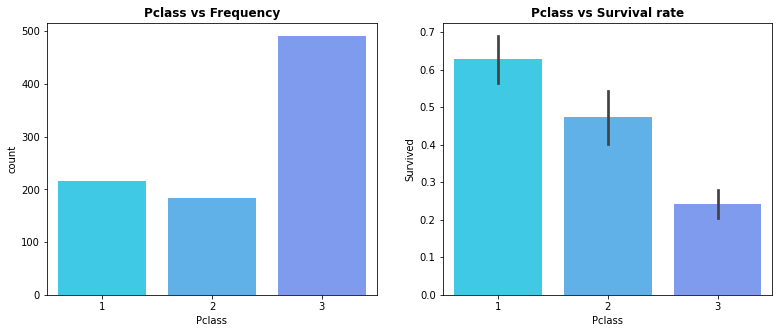

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].set_title("Pclass vs Frequency", fontweight='bold')
axes[1].set_title("Pclass vs Survival rate", fontweight='bold')
fig1_pclass = sns.countplot(data=df, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[1]) 

- As seen the population of passengers as per Pclass is ( 3 > 1 > 2) 
- Survival percentage as per classes is ( 1 > 2 > 3)
- Inference: 1st class passengers have higher survival rate  

##**Title Feature**

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0]) 

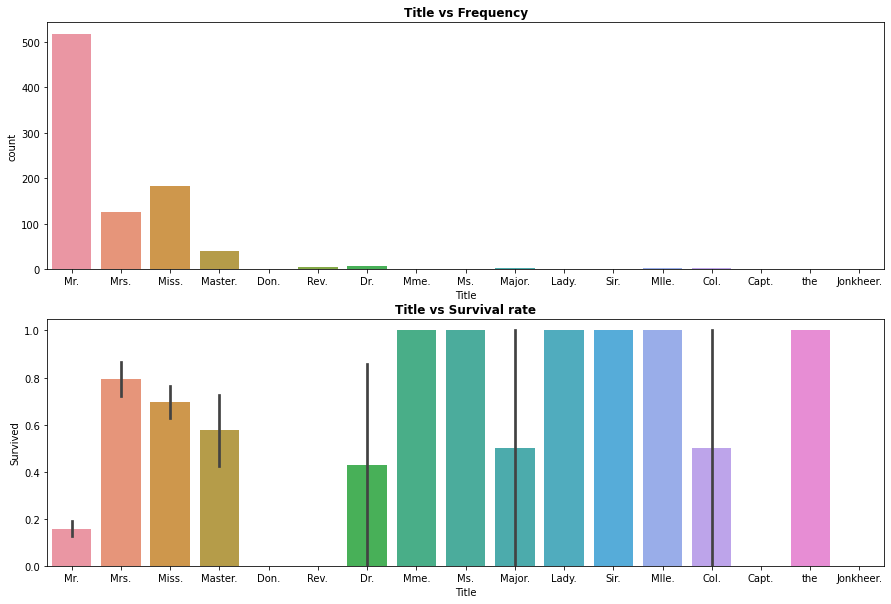

In [ ]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency", fontweight='bold')
axes[1].set_title("Title vs Survival rate", fontweight='bold')
fig1_title = sns.countplot(data=df, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=df, x='Title', y='Survived', ax=axes[1]) 

##**Gender**

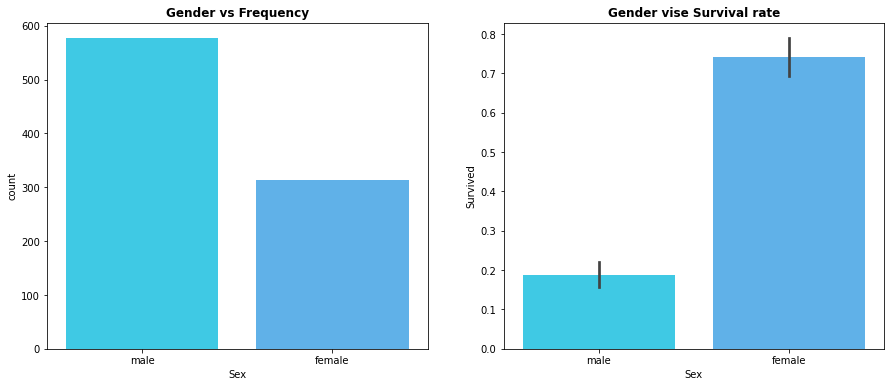

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Gender vs Frequency", fontweight='bold')
axes[1].set_title("Gender vise Survival rate", fontweight='bold')
fig1_gen = sns.countplot(data=df, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=df, x='Sex', y='Survived', ax=axes[1]) 

- As can be seen that (number of males > number of females) but Survival ratio is inverse
- More females survived as compared to males 

##**Age**

In [ ]:
# Creating a list of age values without null values
training_age_n = df.Age.dropna(axis=0)

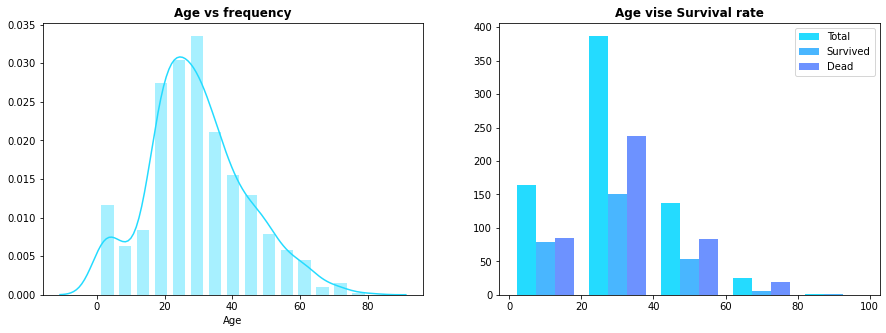

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency", fontweight='bold')
axes[1].set_title("Age vise Survival rate", fontweight='bold')
fig1_age = sns.distplot(a=training_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.7}) 

# Creating a new list of survived and dead

pass_survived_age = df[df.Survived == 1].Age
pass_dead_age = df[df.Survived == 0].Age

axes[1].hist([df.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

Observations:
- Maximum passengers have age between 20-40 years
- Survival rate is maximum for childrens and elderly 

##**SibSp And Parch**

In [ ]:
#No.of siblings/spouses aboard + No.of parents/children aboard + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

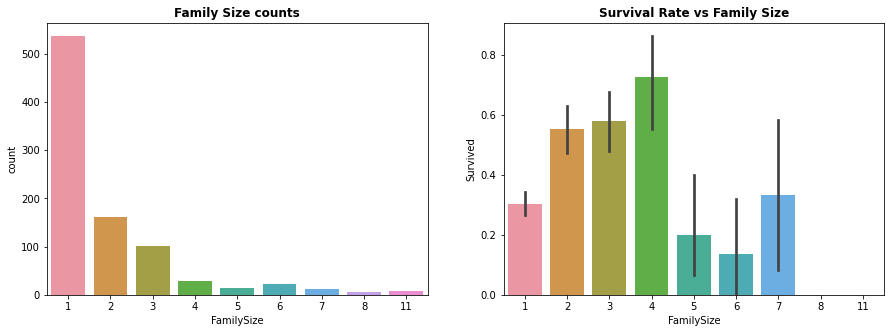

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts', fontweight='bold')
axes[1].set_title('Survival Rate vs Family Size', fontweight='bold')
fig1_family = sns.countplot(x=df.FamilySize, ax=axes[0])
fig2_family = sns.barplot(x=df.FamilySize, y=df.Survived, ax=axes[1]) 

As observed maximum passengers are alone but the survival is maximum for the family of 4 

In [ ]:
df['isAlone'] = df['FamilySize'].map(lambda x: 1 if x == 1 else 0) 

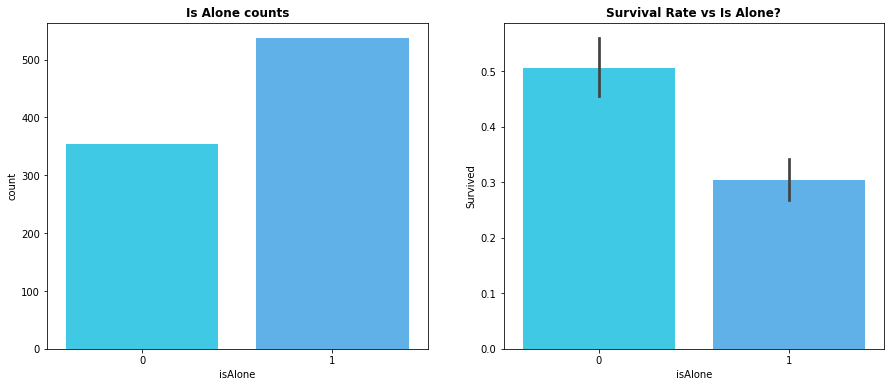

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Is Alone counts', fontweight='bold')
axes[1].set_title('Survival Rate vs Is Alone?', fontweight='bold')
fig1_alone = sns.countplot(data=df, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=df, x='isAlone', y='Survived', ax=axes[1])

As Observed the maximum passengers are alone but survival rate is highest for the family of 3-4 

In [ ]:
# Making a new feature hasCabin which is 1 if cabin is available else 0
df['hasCabin'] = df.Cabin.notnull().astype(int) 

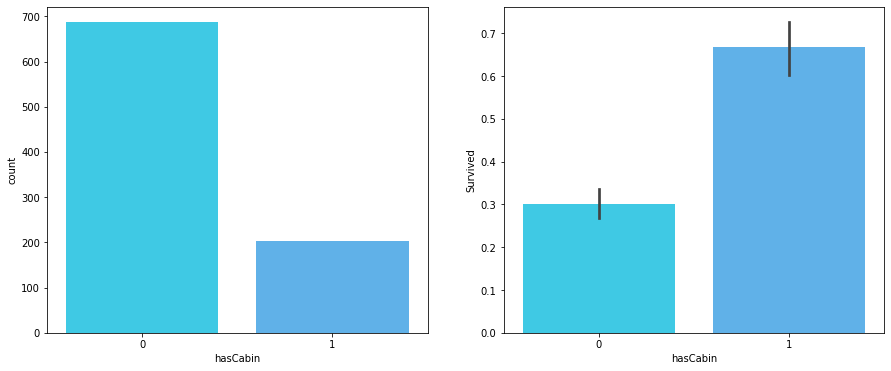

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=df, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=df, x='hasCabin', y='Survived', ax=axes[1]) 

As observed maximum population on titanic dataset does not have cabin but survival for having cabin is more.

##**Embarked**

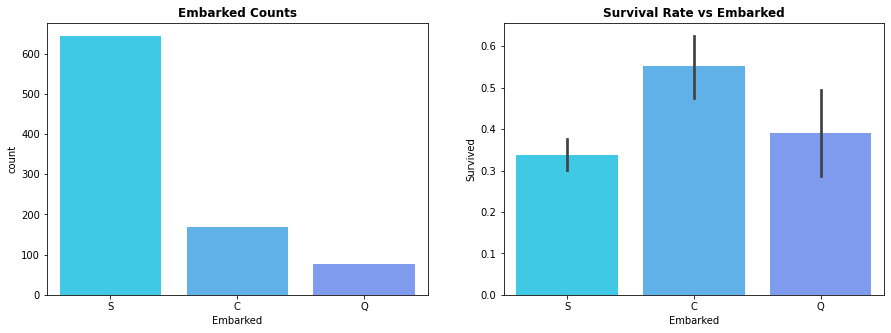

In [ ]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts', fontweight='bold')
axes[1].set_title('Survival Rate vs Embarked', fontweight='bold')
fig1_embarked = sns.countplot(x=df.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=df.Embarked, y=df.Survived, ax=axes[1])

Observations:
- The maximum passengers are from Southampton
- The maximum survival rate is of the passengers who boarded from Cherbourg

In [ ]:
df.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,isAlone,hasCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,0


##**Resolving Missing Values**

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True)
df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,hasCabin
0,0,3,male,22.0,1,0,7.2500,S,2,0,0
1,1,1,female,38.0,1,0,71.2833,C,2,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,0


In [ ]:
df.isnull().sum() 

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
isAlone         0
hasCabin        0
dtype: int64

Filling null vlaues in Age column by the overall mean of that column

In [ ]:
df['Age'].fillna((df['Age'].mean()), inplace=True) 

In [ ]:
df.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
FamilySize    0
isAlone       0
hasCabin      0
dtype: int64

Replacing nan values in every column by C, we only have Embarked left with nan so it wont harm the other values.

In [ ]:
df = df.replace(np.nan, 'C', regex=True)
df = df.fillna('C') 

In [ ]:
df.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
isAlone       0
hasCabin      0
dtype: int64

In [ ]:
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,hasCabin
0,0,3,male,22.0,1,0,7.2500,S,2,0,0
1,1,1,female,38.0,1,0,71.2833,C,2,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,0


##**Resolving categorical data** 

In [ ]:
gender = {'male': 1,'female': 2} 
#Port of Embarkation
embark = {'C': 0, 'Q': 1, 'S': 2}
df.Sex = [gender[item] for item in df.Sex]  
df.Embarked = [embark[item] for item in df.Embarked] 

In [ ]:
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,hasCabin
0,0,3,1,22.0,1,0,7.2500,2,2,0,0
1,1,1,2,38.0,1,0,71.2833,0,2,0,1
2,1,3,2,26.0,0,0,7.9250,2,1,1,0
3,1,1,2,35.0,1,0,53.1000,2,2,0,1
4,0,3,1,35.0,0,0,8.0500,2,1,1,0


In [ ]:
X = df.iloc[:, 1:11].values
y = df.iloc[:, 0].values

In [ ]:
# Splitting the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17) 

In [ ]:
# Feature Scaling

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)  

In [ ]:
# Making a list of accuracies
accuracies = [] 

##**Logistic Regression**

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score) 

0.7763157894736842


##**Support Vector Machine - Linear Kernel**

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score) 

0.7368421052631579


##**Support Vector Machine - RBF Kernel**

In [ ]:
k_svm = SVC(kernel='rbf')
k_svm.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
k_svm_score = k_svm.score(X_test, y_test)
accuracies.append(k_svm_score)
print(k_svm_score) 

0.7763157894736842


##**KNN Classifier**

In [ ]:
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn_score = knn.score(X_test, y_test)
accuracies.append(knn_score)
print(knn_score) 

0.7697368421052632


##**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_score = rfc.score(X_test, y_test)
rfc_score_tr = rfc.score(X_train, y_train)
accuracies.append(rfc_score)
print(rfc_score)
print(rfc_score_tr)

0.8092105263157895
0.9878213802435724


In [ ]:
myLabels = ['Logistic Regression', 'SVM', 'Kernel SVM', 'KNN', 'Random Forest'] 

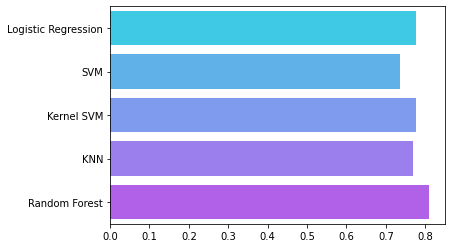

In [ ]:
fig1_accu= sns.barplot(x=accuracies, y=myLabels) 

As observed Random Forest performs best.

Since Random Forest scores best, we will apply Grid Search CV on RF

#**GridSearchCV!!** 

You can pass your model parameters and GridSearch will return the best parameters that fit the dataset for that classifier!!

In [ ]:
# grid search method 
param_grid = {'n_estimators': [1, 10, 20, 50, 100, 150, 200, 1000, 2000],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5]}
GS = GridSearchCV(RandomForestClassifier(),param_grid) 
GS.fit(X_train, y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_)) 

the parameters {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 50} are the best.
the best score is 0.83.


##**Confusion Matrix**

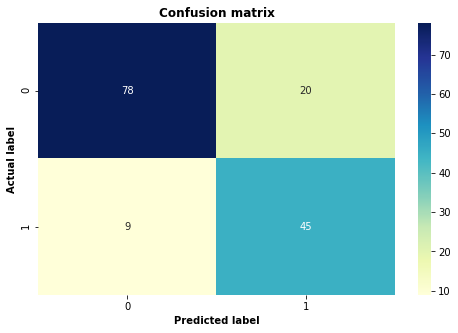

In [ ]:
y_pred = rfc.predict(X_test)  
cm = confusion_matrix(y_pred, y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold'); 

#**Summary**
- You have learned to do some EDA and feature engineering for a cleaner dataset.
- Trained data on 5 differnt Classifiers
- Used GridSearchCV for best hyperparameter choices

#**References**
- [DT](https://scikit-learn.org/stable/modules/tree.html)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)